In [2]:
import ROOT as rt
import uproot
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

import gpustat
gpustat.print_gpustat()
os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02
gpu-ibanks-1.hep.caltech.edu   Mon Aug  2 16:05:48 2021  470.57.02
[0] NVIDIA GeForce GTX TITAN X | 33'C,   0 % |     1 / 12212 MB |
[1] NVIDIA GeForce GTX TITAN X | 31'C,   0 % |     1 / 12212 MB |


In [3]:
# Random Data Selection
def ran_data(num, total):
    sample_num = []
    for i in range(num):
        samp = np.random.randint(0, high=total+1)
        while samp in sample_num:
            samp = np.random.randint(0, high=total+1)
        sample_num.append(samp)
    return sample_num

# Data loading
def data_to_df(samp_num):
    file_name = f'../HHbbggAna/condor/output/job_1_ntuple20180625v1/dataJob1ifile{samp_num}.root'
    data_file = uproot.open(file_name)
    data_array = data_file['tree'].arrays()
    data_df = pd.DataFrame(data_array)
    return data_df

In [ ]:
# Load full data??
data_2018_full_dfs = []
for i in range(945):
    data_2018_full_dfs.append(data_to_df(i))
data_2018_full_df = pd.concat(data_2018_full_dfs)

In [4]:
samp_indice_2018 = ran_data(20, 945)
data_2018_dfs = []
for samp in samp_indice_2018:
    data_2018_dfs.append(data_to_df(samp))
data_2018_df = pd.concat(data_2018_dfs)

In [6]:
total = np.sum(data_2018_df.loc[:, b'genweight'].values)
print(f'Total: {total}')
rec = np.sum(data_2018_df.loc[:, b'recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Overall recon: {rec}')
brec = np.sum(data_2018_df.loc[:, b'bjet_recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Bjet recon: {brec}')
prec = np.sum(data_2018_df.loc[:, b'photon_recon'].values * data_2018_df.loc[:, b'genweight'].values)
print(f'Photon recon: {prec}')

Total: 28452510.0
Overall recon: 4270.0
Bjet recon: 116946.0
Photon recon: 50348.0


In [1]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

for pvar in photon_vars:
    plt.figure()
    plt.hist(data_2018_df[pvar], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    plt.figure()
    plt.hist(data_2018_df[bvar], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    plt.figure()
    plt.hist(data_2018_df[evar], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

NameError: name 'plt' is not defined

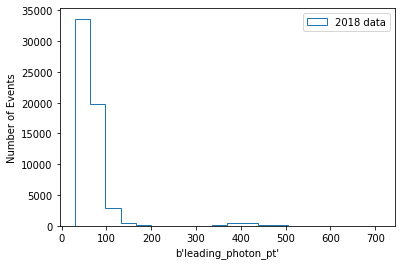

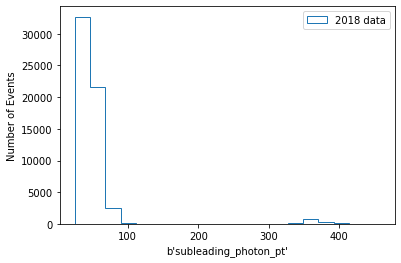

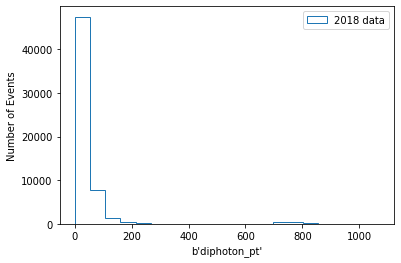

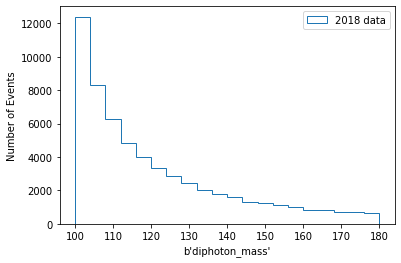

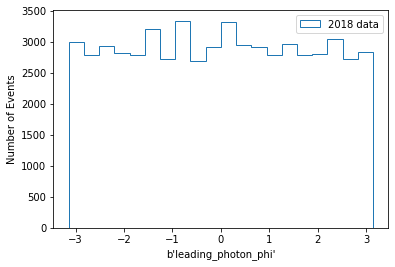

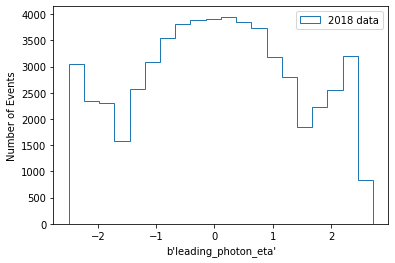

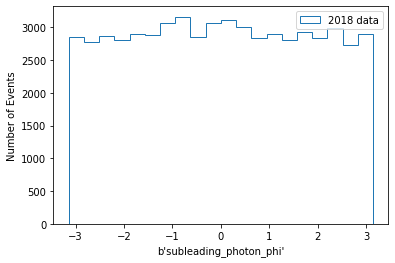

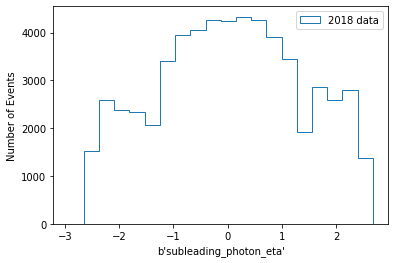

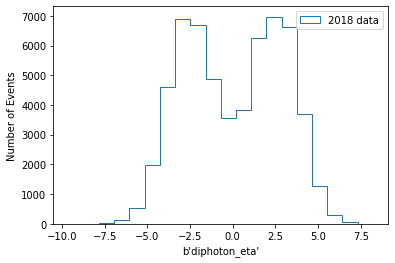

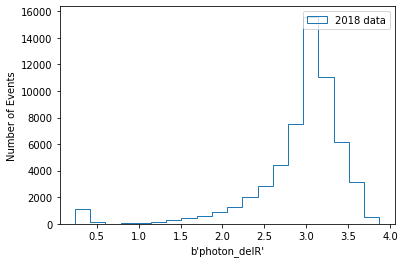

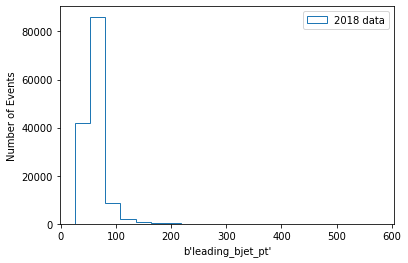

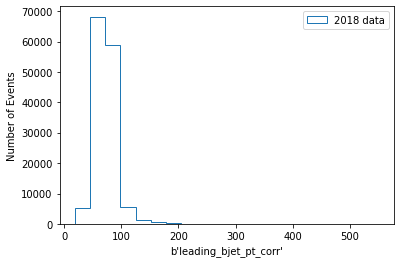

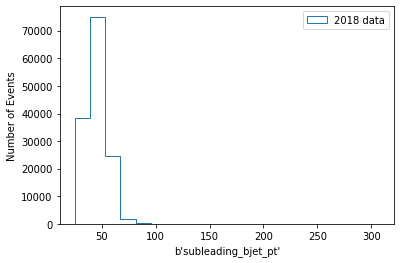

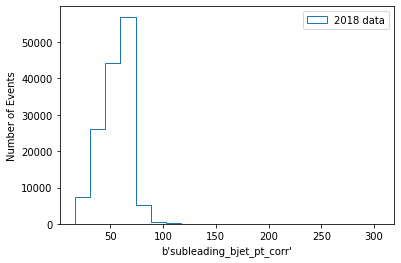

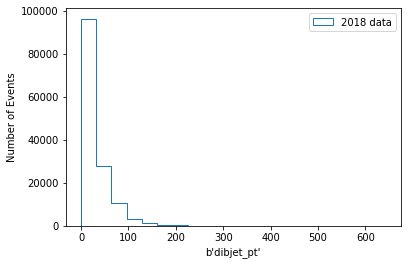

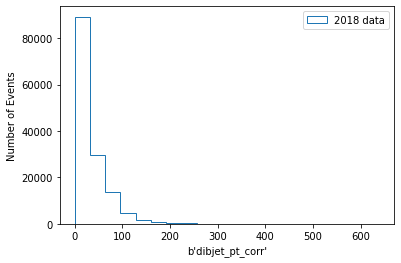

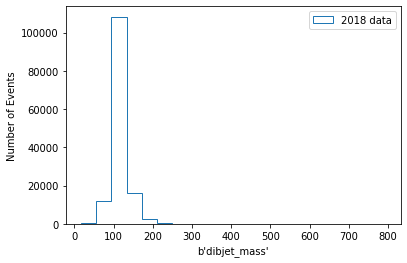

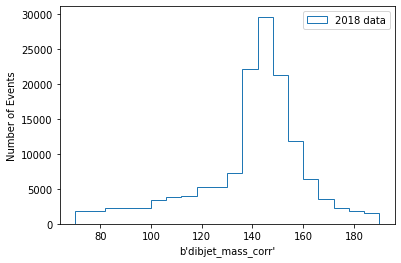

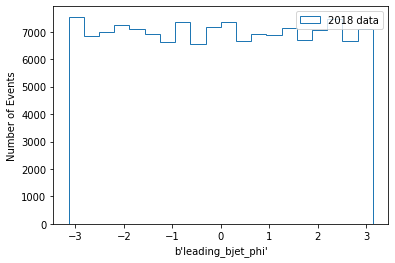

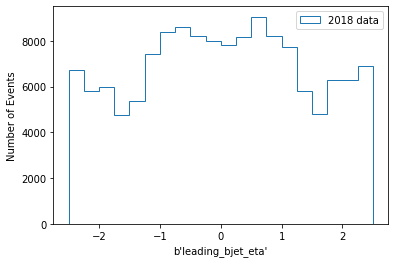

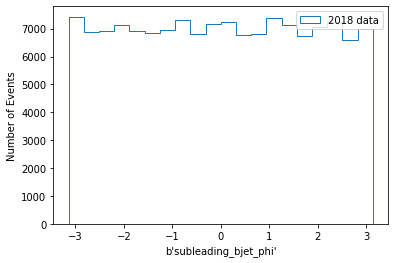

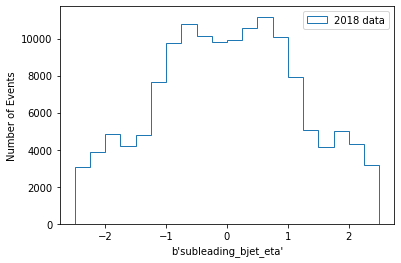

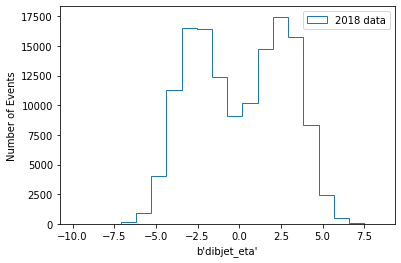

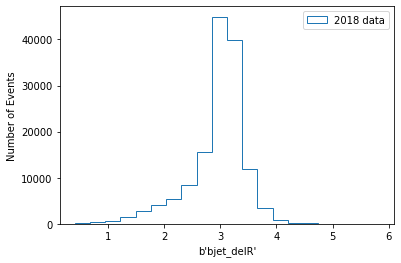

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


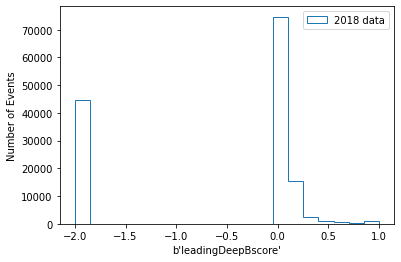

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


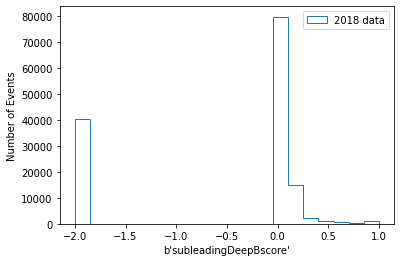

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


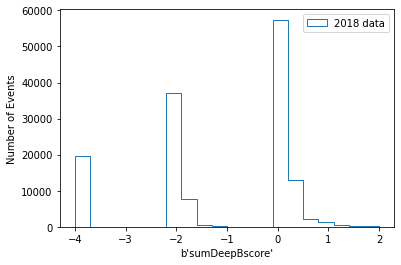

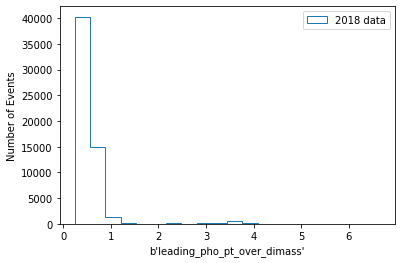

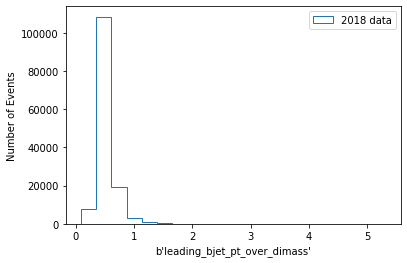

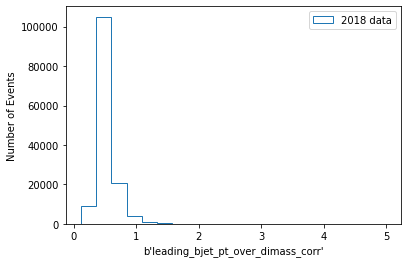

In [16]:
photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

for pvar in photon_vars:
    vals = data_2018_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = data_2018_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = data_2018_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals[vals > -100], bins=20, histtype='step', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()